In [21]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### B0005 데이터셋

In [22]:
def load_data(battery):
  mat = loadmat('C:/LEE/batterydata/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.004902             24.330034       -0.0006         0.000   0.000  
1         -0.001478             24.325993       -0.0006         4.206  16.781  
2         -2.012528             24.389085       -1.9982         3.062  35.703  
3         -2.

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,2008-05-07 01:58:43.570826240,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
min,1.000000,24.0,2008-04-02 15:25:41,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,2008-04-29 22:00:04,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,2008-05-07 21:56:09,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,2008-05-18 03:05:19,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,2008-05-27 20:45:42,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000
std,45.699687,0.0,NaN,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295


In [23]:
print(dataset.tail())

       cycle  ambient_temperature            datetime  capacity  \
50280    168                   24 2008-05-27 20:45:42  1.325079   
50281    168                   24 2008-05-27 20:45:42  1.325079   
50282    168                   24 2008-05-27 20:45:42  1.325079   
50283    168                   24 2008-05-27 20:45:42  1.325079   
50284    168                   24 2008-05-27 20:45:42  1.325079   

       voltage_measured  current_measured  temperature_measured  current_load  \
50280          3.579262         -0.001569             34.864823        0.0006   
50281          3.581964         -0.003067             34.814770        0.0006   
50282          3.584484         -0.003079             34.676258        0.0006   
50283          3.587336          0.001219             34.565580        0.0006   
50284          3.589937         -0.000583             34.405920        0.0006   

       voltage_load      time  
50280           0.0  2781.312  
50281           0.0  2791.062  
50282         

### 사이클 갯수

In [24]:
# 각 사이클 번호의 개수를 확인
cycle_counts = dataset['cycle'].value_counts().sort_index()
print("각 사이클의 데이터 포인트 개수:")
print(cycle_counts)

각 사이클의 데이터 포인트 개수:
cycle
1      197
2      196
3      195
4      194
5      194
      ... 
164    297
165    297
166    297
167    298
168    300
Name: count, Length: 168, dtype: int64


# capacity 

In [25]:
# Capacity 데이터프레임의 주요 통계량 출력
print("Capacity 데이터프레임 주요 통계량:")
print(capacity['capacity'].describe())

# 각 사이클의 capacity 값 출력
print("\n각 사이클의 capacity 값:")
print(capacity[['cycle', 'capacity']])

Capacity 데이터프레임 주요 통계량:
count    168.000000
mean       1.572502
std        0.190413
min        1.287453
25%        1.390021
50%        1.557085
75%        1.769163
max        1.856487
Name: capacity, dtype: float64

각 사이클의 capacity 값:
     cycle  capacity
0        1  1.856487
1        2  1.846327
2        3  1.835349
3        4  1.835263
4        5  1.834646
..     ...       ...
163    164  1.293464
164    165  1.288003
165    166  1.287453
166    167  1.309015
167    168  1.325079

[168 rows x 2 columns]


### 방전주기(cycle)에 따른 용량(capacity)의 변화

Text(0.5, 1.0, 'Discharge B0005')

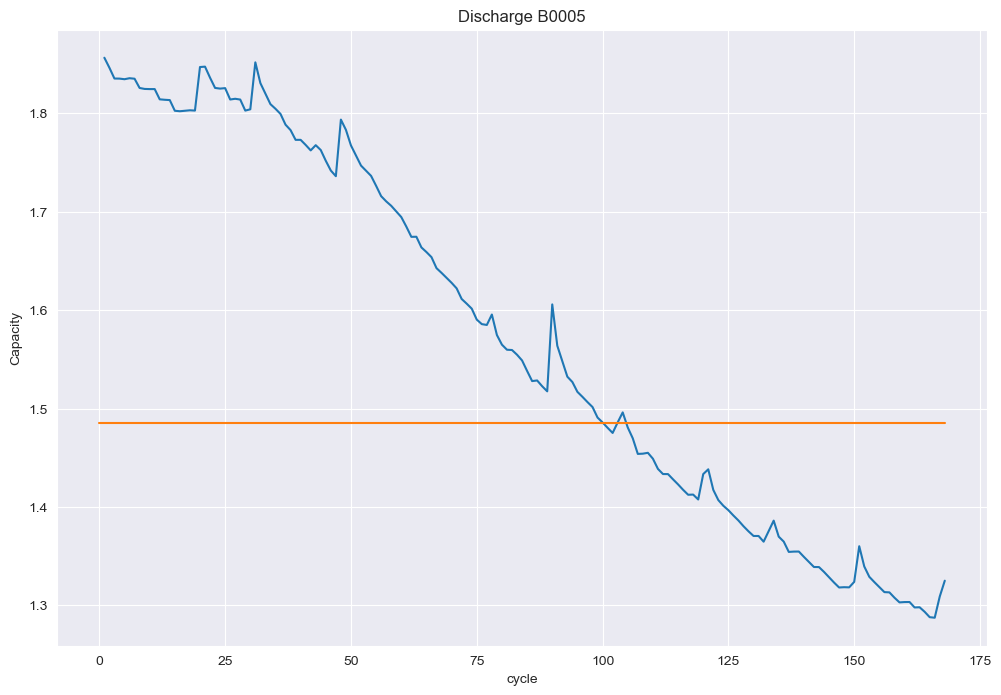

In [26]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]   # cycle이 1이상인 값 선택
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])   # cycle을 x축, capacity를 y축
#Draw threshold
plt.plot([0.,len(capacity)], [1.485, 1.485])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

### 방전 용량에 따른 SOH(State of Health) 계산

In [27]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


### 방전 주기에 따른 SOH(State of Health) 시각화

Text(0.5, 1.0, 'Discharge B0005')

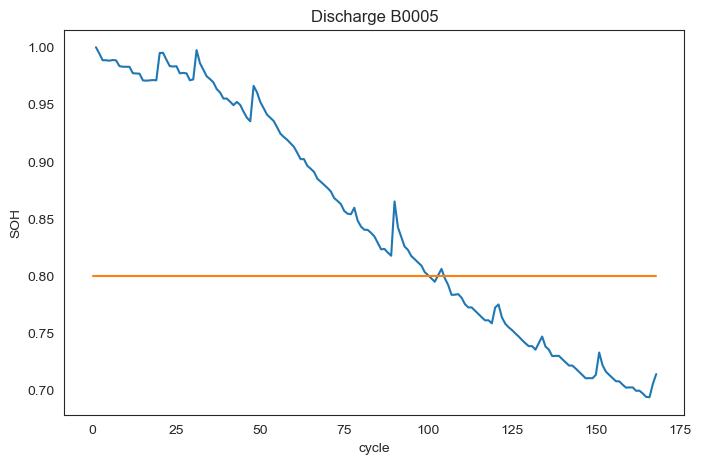

In [28]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.80, 0.80])   # 임의로 정한 용량(80%)
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

### 배터리 데이터에서 SOH 계산, 특정 속성들 정규화한 훈련용 데이터 준비

In [29]:
C = dataset['capacity'][0]
soh = []   # 각 주기마다의 SOH값 저장
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))   # 0에서 1 사이의 값으로 정규화
train_dataset = sc.fit_transform(train_dataset)
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

### ANN 모델

In [11]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))   # 과적합 방지지
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

### 훈련데이터와 테스트 데이터 

In [31]:
dataset_val, capacity_val = load_data('B0005')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
rows=['cycle','capacity']
dataset=dis_ele[rows]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


### LSTM모델 (epoch(200번 반복학습), batch_size(한번에 25개 샘플 사용))

In [32]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.4))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.4))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.4))
regress.add(LSTM(units=200))
regress.add(Dropout(0.4))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 200)        │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10, 200)        │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,124,201 (4.29 MB)

 Trainable params: 1,124,201 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.3028
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1252
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0994
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0541
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0698
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0560
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0504
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0451
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0429
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0489
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0517
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0394
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0406
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0431
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0399
Epoch 16/200
2/2 ━━

In [34]:
print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

119


### test데이터로 예측수행

In [35]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002B972E14EA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step
(119, 1)
Test RMSE: 0.038


0.9196370662306885

### 모델 저장

In [36]:
# 모델 저장
regress.save('lstm_battery_model.keras')


### 모델 불러오기

In [37]:
from tensorflow.keras.models import load_model

# 저장된 모델 로드
loaded_model = load_model('lstm_battery_model.keras')

# 로드된 모델을 사용하여 예측
pred = loaded_model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step


### 예측 soh와 실제 데이터 비교 시각화

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\1198164500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pre']=pred


Text(0.5, 1.0, 'Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

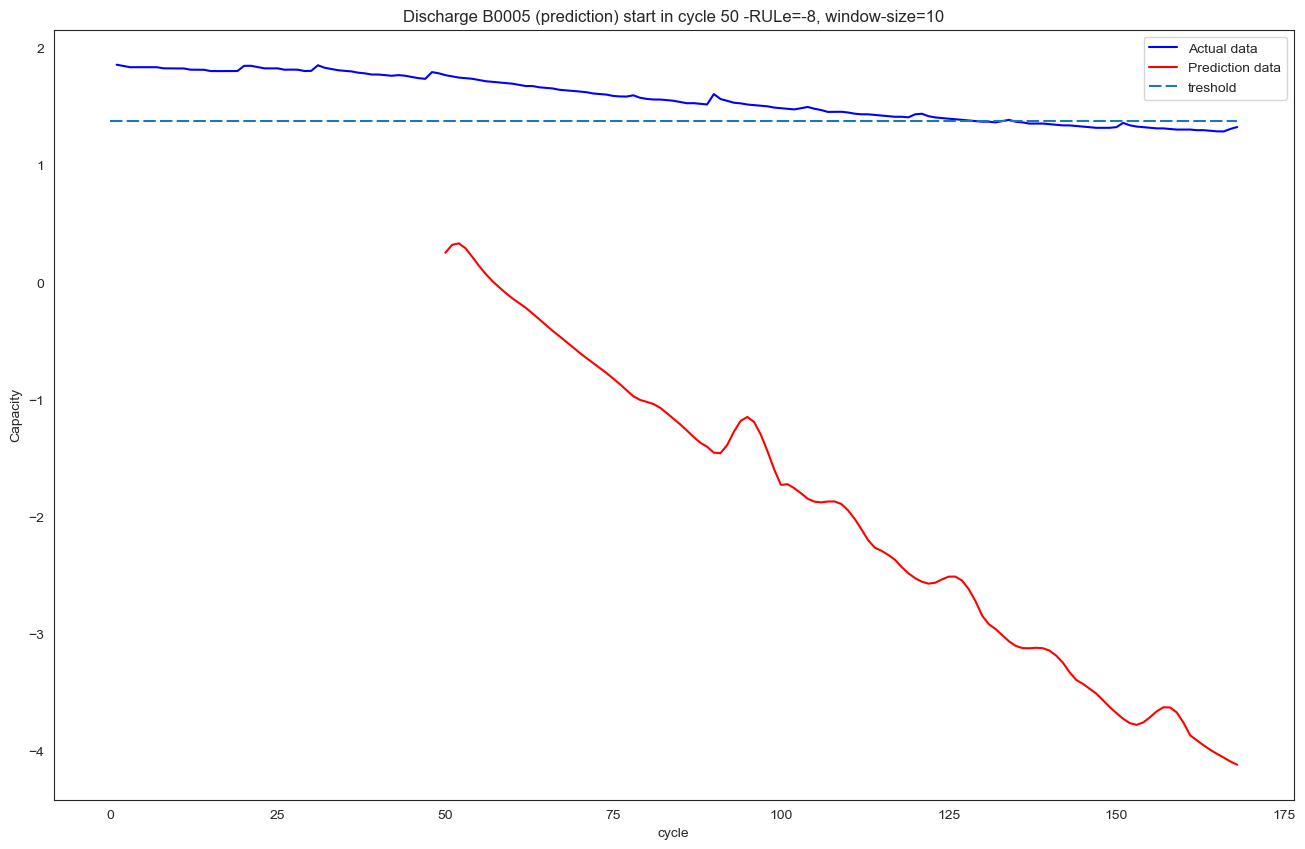

In [38]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

### 실제용량 임계치로 떨어지는 주기, 모델이 예측한 임계치 도달 주기 비교
### 남은 사용 수명 예측

In [39]:
pred=0   
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 128
The prediction fail at cycle number: 49
The error of RUL= -79 Cycle(s)


128 : 실제 데이터에서 배터리가 임계치(1.38)에 도달하여 사용할 수 없게된 주기가 128
151 : 모델의 예측에서 배터리가 임계치에 도달하는 주기가 151번째 주기 즉, 실제로는 23주기 늦게 임계치에 도달할 것으로 예측
23 : 남은 사용 수명 예측 오차가 23주기

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\764080323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['SoH_actual'] = data_test['capacity'] / initial_capacity
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\764080323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['SoH_pred'] = data_test['pre'] / initial_capacity


Text(0.5, 1.0, 'Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

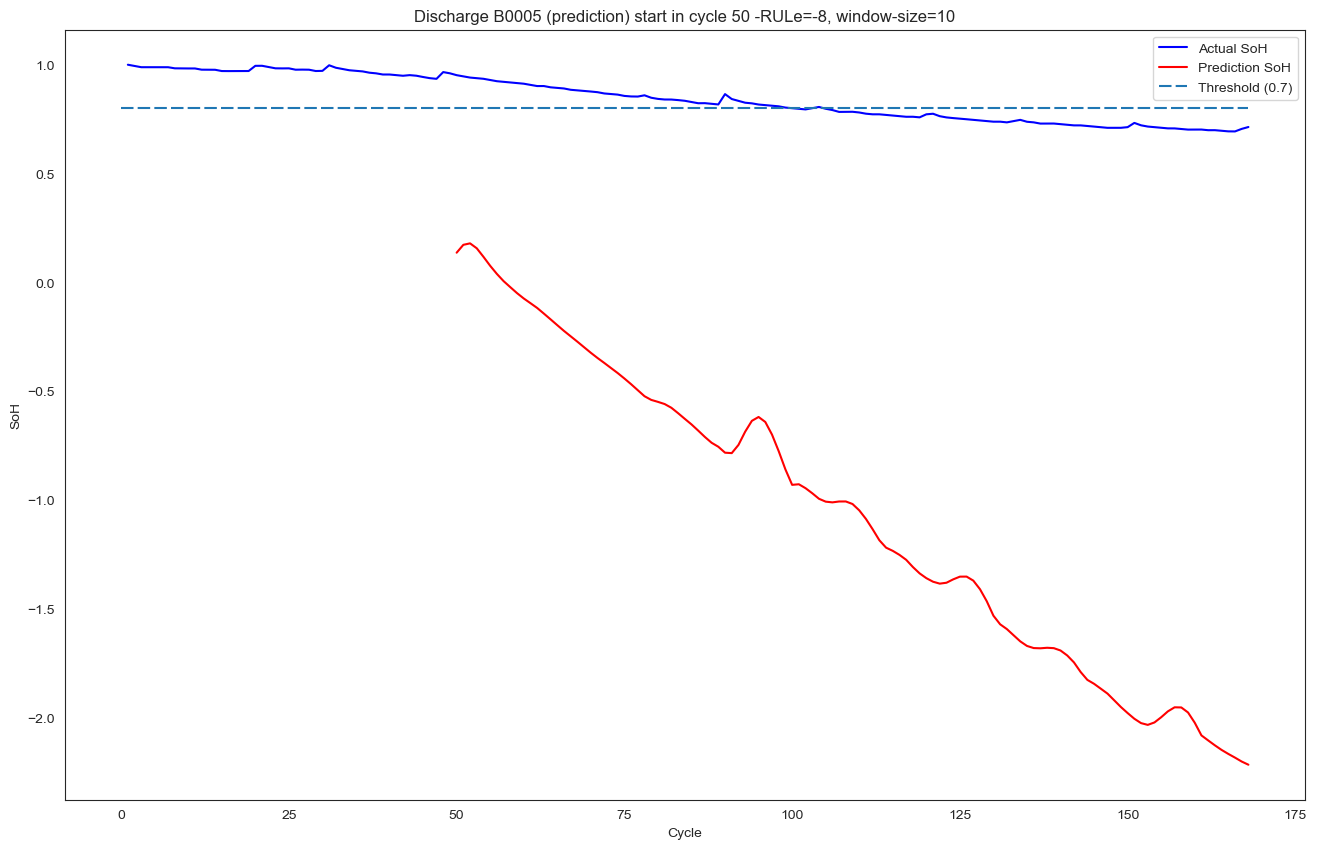

In [40]:
# Initial capacity (e.g., first cycle capacity) for SoH calculation
initial_capacity = data_train['capacity'].iloc[0]

# Calculate SoH for actual and predicted data
data_test['SoH_actual'] = data_test['capacity'] / initial_capacity
data_test['SoH_pred'] = data_test['pre'] / initial_capacity

# Plot with SoH on the y-axis
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'] / initial_capacity, label="Actual SoH", color='blue')
plt.plot(plot_per['cycle'], plot_per['pre'] / initial_capacity, label="Prediction SoH", color='red')
# Draw threshold (e.g., 70% SoH threshold)
plt.plot([0., 168], [0.8, 0.8], dashes=[6, 2], label="Threshold (0.7)")
plt.ylabel('SoH')
plt.xlabel('Cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

In [41]:
# 20개 시점의 온도, 전류, 전압 데이터 준비 (예: temp_data, curr_data, volt_data)
# temp_data, curr_data, volt_data는 각각 길이가 20인 리스트로 준비합니다.
input_data = np.array([temp_data, curr_data, volt_data]).T  # 20 x 3 형태로 전치

# 데이터 정규화 (학습 시 사용한 scaler를 적용)
input_data = scaler.transform(input_data)

# 입력 데이터를 LSTM 형식에 맞게 재구성
input_data = input_data.reshape((1, input_data.shape[0], input_data.shape[1]))

# 예측 수행
predicted_capacity = model.predict(input_data)

# 예측 결과를 원래 스케일로 변환
predicted_capacity = scaler.inverse_transform([[0, 0, 0, predicted_capacity[0, 0]]])[0, 3]
print(f"Predicted Capacity: {predicted_capacity}")


NameError: name 'temp_data' is not defined